<a href="https://colab.research.google.com/github/0Pedrh0/Automatic_Speech_Processing/blob/main/TP2_3EA_2024_Hani_Benarib_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 Traitement Autonmatique de la Parole

**NOM1** : HANI

**Prénom1** : Badreddine

**Email1** : badrhanib@gmail.com

**NOM2** : BENARIB

**Prénom2** : Ilyes

**Email2** : benarib.ilyes@gmail.com

Initialisation de l'environnement de TP

In [2]:
# OS setup
#!cat /etc/os-release
!apt-get install -qq bc tree sox

# Liaison avec les données
!git clone https://github.com/0Pedrh0/Automatic_Speech_Processing.git

# Spectrum
!pip install spectrum

Selecting previously unselected package libopencore-amrnb0:amd64.
(Reading database ... 126666 files and directories currently installed.)
Preparing to unpack .../0-libopencore-amrnb0_0.1.5-1_amd64.deb ...
Unpacking libopencore-amrnb0:amd64 (0.1.5-1) ...
Selecting previously unselected package libopencore-amrwb0:amd64.
Preparing to unpack .../1-libopencore-amrwb0_0.1.5-1_amd64.deb ...
Unpacking libopencore-amrwb0:amd64 (0.1.5-1) ...
Selecting previously unselected package libsox3:amd64.
Preparing to unpack .../2-libsox3_14.4.2+git20190427-2+deb11u2ubuntu0.22.04.1_amd64.deb ...
Unpacking libsox3:amd64 (14.4.2+git20190427-2+deb11u2ubuntu0.22.04.1) ...
Selecting previously unselected package libsox-fmt-alsa:amd64.
Preparing to unpack .../3-libsox-fmt-alsa_14.4.2+git20190427-2+deb11u2ubuntu0.22.04.1_amd64.deb ...
Unpacking libsox-fmt-alsa:amd64 (14.4.2+git20190427-2+deb11u2ubuntu0.22.04.1) ...
Selecting previously unselected package libwavpack1:amd64.
Preparing to unpack .../4-libwavpack1_

In [3]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import scipy.signal
import numpy as np
import librosa as l
from IPython.display import Audio

In [4]:
!tree Automatic_Speech_Processing/tp-3en-n7/signaux/alpha/

Automatic_Speech_Processing/tp-3en-n7/signaux/alpha/
├── mots_inconnus
│   ├── alpha.wav
│   ├── bravo.wav
│   ├── charlie.wav
│   ├── delta.wav
│   ├── echo.wav
│   ├── foxtrott.wav
│   ├── golf.wav
│   ├── hotel.wav
│   ├── india.wav
│   ├── juliett.wav
│   ├── kilo.wav
│   ├── lima.wav
│   └── mike.wav
└── references
    ├── alpha.wav
    ├── bravo.wav
    ├── charlie.wav
    ├── delta.wav
    ├── echo.wav
    ├── foxtrott.wav
    ├── golf.wav
    ├── hotel.wav
    ├── india.wav
    ├── juliett.wav
    ├── kilo.wav
    ├── lima.wav
    └── mike.wav

2 directories, 26 files


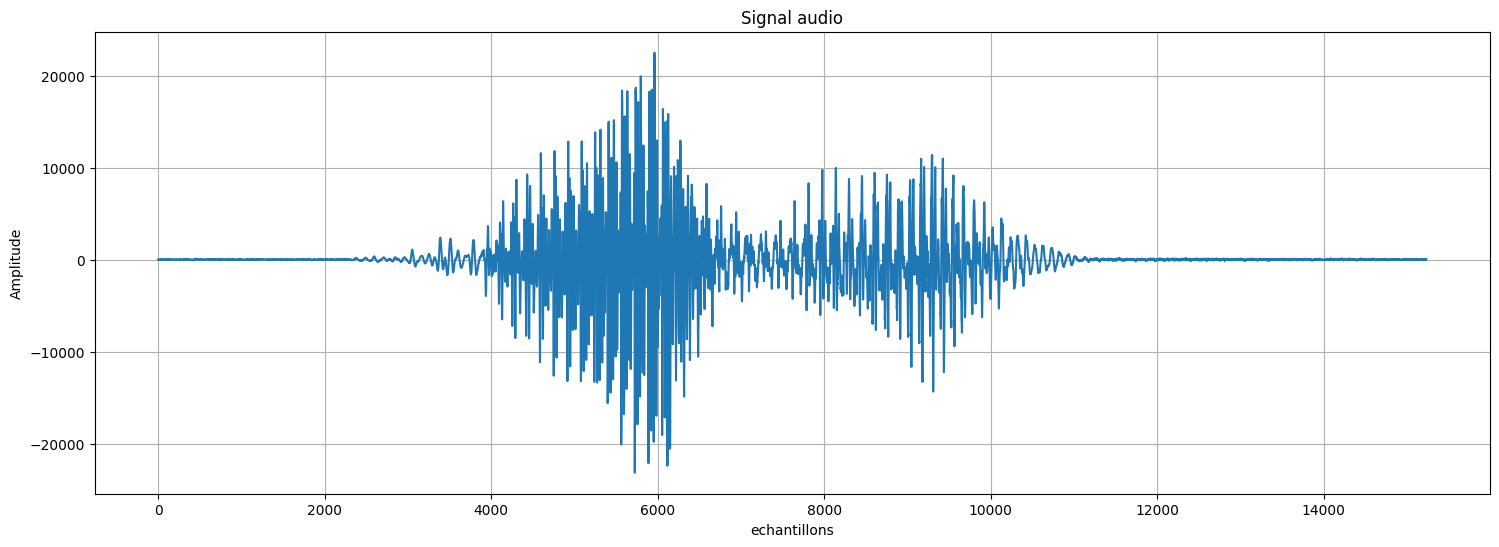

In [72]:
(fe,signal) =  scipy.io.wavfile.read("Automatic_Speech_Processing/tp-3en-n7/signaux/alpha/references/bravo.wav")
# Affichage du signal
plt.figure(figsize=(18,6))
plt.plot(np.arange(len(signal)),signal)
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()
# lecture du fichier
Audio(data=signal, rate=fe)

Nous allons commencer par travailler sur un extrait voisé du signal :

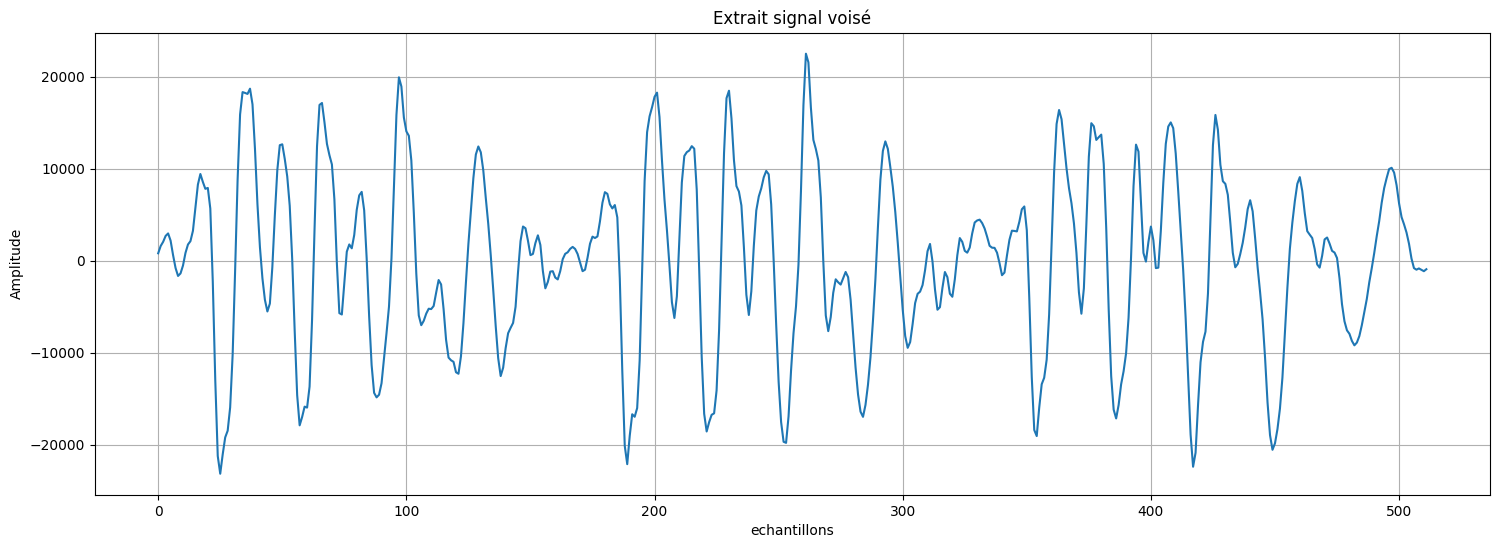

In [71]:
extrait = signal[5700:6212]
# Affichage du signal
plt.figure(figsize=(18,6))
plt.plot(np.arange(len(extrait)),extrait)
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Extrait signal voisé')
plt.grid(True)
plt.show()

***Affichez une fenetre hamming de 512 points. Puis créez la variable extrait_fenetre qui resulte de la multiplication point par point de la fenetre de hamming et de l'extrait de signal. Affichez le signal résultant.***

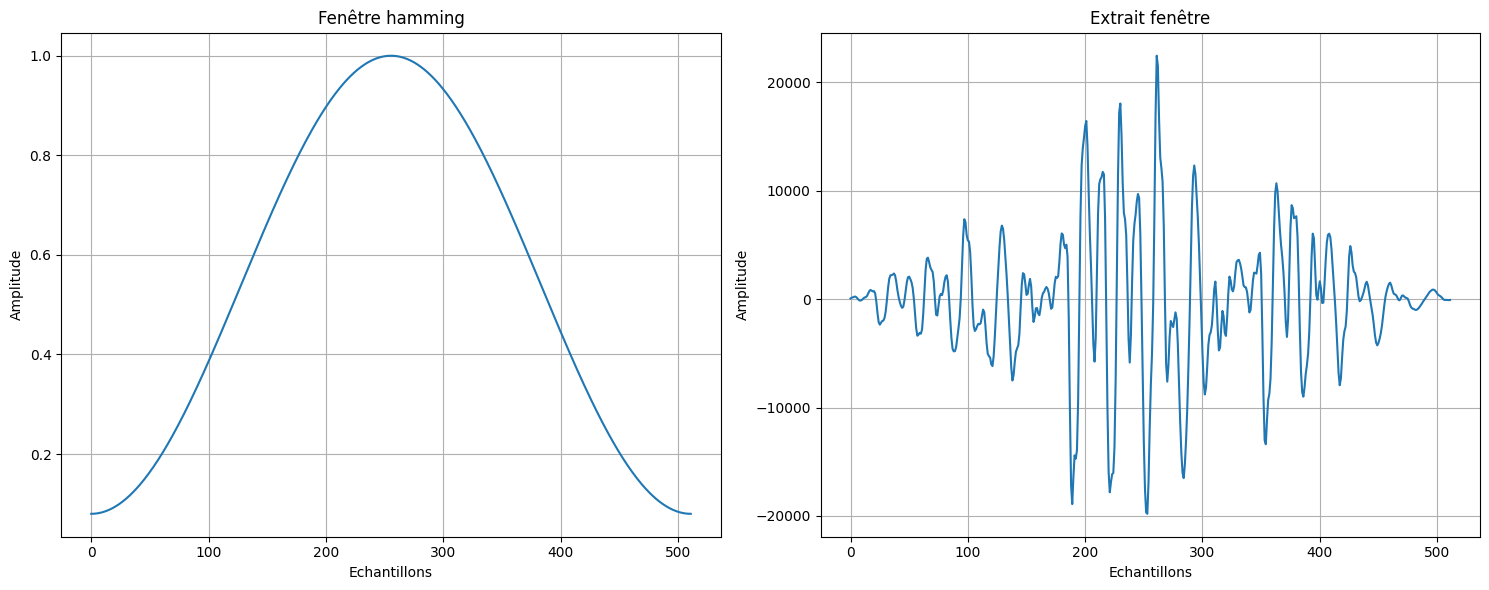

In [31]:
# Création d'une fenêtre hamming
fenetre_hamming = scipy.signal.windows.hamming(512)

# Création d'une extrait fenêtré
extrait_fenetre = extrait*fenetre_hamming

# Affichage des figures
plt.figure(figsize=(15,6))

plt.subplot(1,2,1) # Fenêtre Hamming
plt.plot(np.arange(len(fenetre_hamming)),fenetre_hamming)
plt.xlabel('Echantillons')
plt.ylabel('Amplitude')
plt.title('Fenêtre hamming')
plt.grid(True)

plt.subplot(1,2,2) # Extrait fenêtré
plt.plot(np.arange(len(extrait_fenetre)),extrait_fenetre)
plt.xlabel('Echantillons')
plt.ylabel('Amplitude')
plt.title('Extrait fenêtre')
plt.grid(True)


plt.tight_layout()
plt.show()



***Affichez le spectre de puissance de la transformée de Fourier de l'extrait fenetré. Représentez les fréquences en abscisse. Vous pouvez utiliser la fonction np.fft.fft pour calculer la transformée de Fourier ou bien utiliser son équivalent sur librosa.***

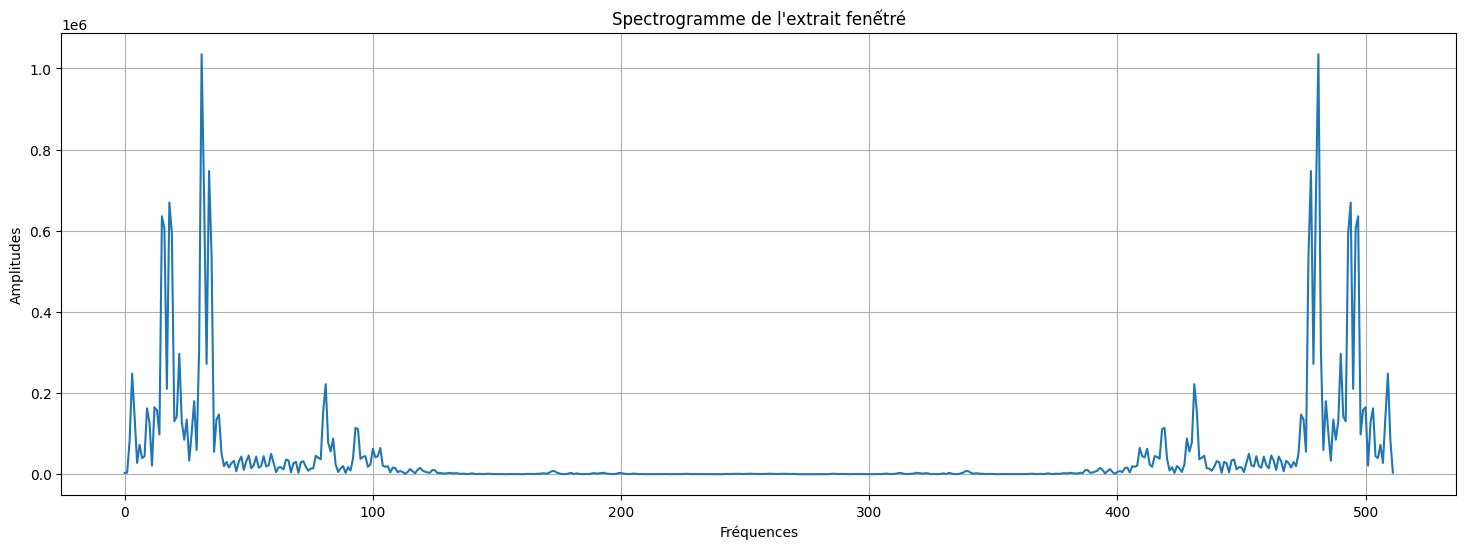

In [70]:
# Calcul et Affichage du spectre de puissance de la transformée de Fourier de l'extrait fenêtré

extrait_fft = np.fft.fft(extrait_fenetre) # FFT
puissance_extrait = abs(extrait_fft) # Module de la FFT

plt.figure(figsize=(18,6))
plt.plot(np.arange(len(puissance_extrait)),puissance_extrait)
plt.xlabel('Fréquences')
plt.ylabel('Amplitudes')
plt.title("Spectrogramme de l'extrait fenếtré")
plt.grid(True)


***Affichez un spectrogramme du signal de départ.***

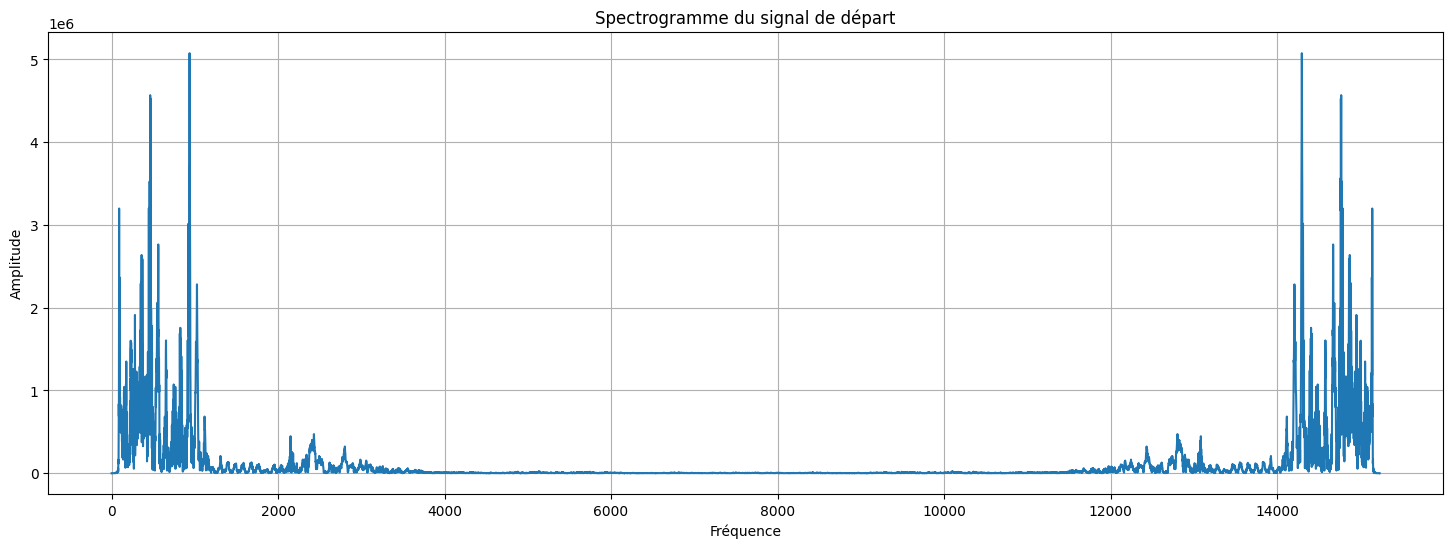

In [69]:
# Affichage d'un spectrogramme du signal de départ

signal_fft = np.fft.fft(signal) # FFT
puissance_signal = abs(signal_fft) # Module de la FFT

plt.figure(figsize=(18,6))
plt.plot(np.arange(len(puissance_signal)),puissance_signal)
plt.xlabel('Fréquence')
plt.ylabel('Amplitude')
plt.title('Spectrogramme du signal de départ')
plt.grid(True)


***Calculez le log énergie du signal sur des fenêtres de 512 points avec recouvrement sur la moitié. Affichez les valeurs ainsi calculées aligné avec le signal.***

$E=\log\left(\sum_{i=1}^{n}x_{i}^{2}\right)$

In [34]:
# ------ Calcul du log énergie du signal ----------------

# Préparation des données
signal_normalise = signal/max(signal) # Normalisation du signal pour éviter le débordement de valeurs
pas = 256 # Recouvrement sur la moitié
Nb_Fenetres = np.floor(signal_normalise.shape[0]/pas).astype(int) # Nombre de fenêtres
Log_Energies = np.zeros(Nb_Fenetres)

# Calcul des Log_Energies de chaque fenêtre
for i in range (Nb_Fenetres):
  debut = i*pas
  fin = debut + pas*2
  extrait_normalise = signal_normalise[debut:fin]
  Log_Energies[i] = np.log(np.sum((extrait_normalise**2)))

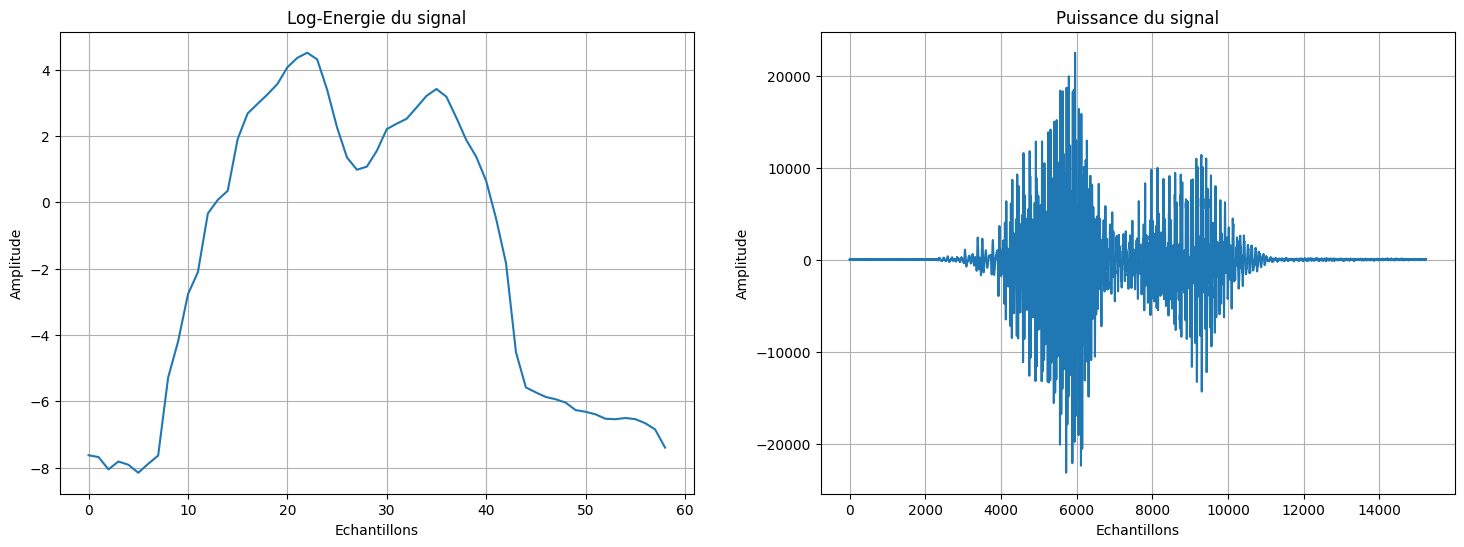

In [48]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.plot(np.arange(len(Log_Energies)),Log_Energies)
plt.xlabel('Echantillons')
plt.ylabel('Amplitude')
plt.title('Log-Energie du signal')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(np.arange(len(signal)),signal)
plt.xlabel('Echantillons')
plt.ylabel('Amplitude')
plt.title('Puissance du signal')
plt.grid(True)


plt.show()


***Peut-on repérer les voyelles facilement avec cette représentation ?***

Avec cette représentation, on parvient à repérer plus facilement les voyelles. Ces dernières correspondant souvent aux zones où l'énergie est la plus importantes, on peut supposer que les premiers pics correspondent au "a" et "o" du mot "bravo" prononcé.

***Calculez le cepstre de l'extrait de signal. Affichez le. Où se trouve l'excitation liée à la vibration des cordes vocales ?***

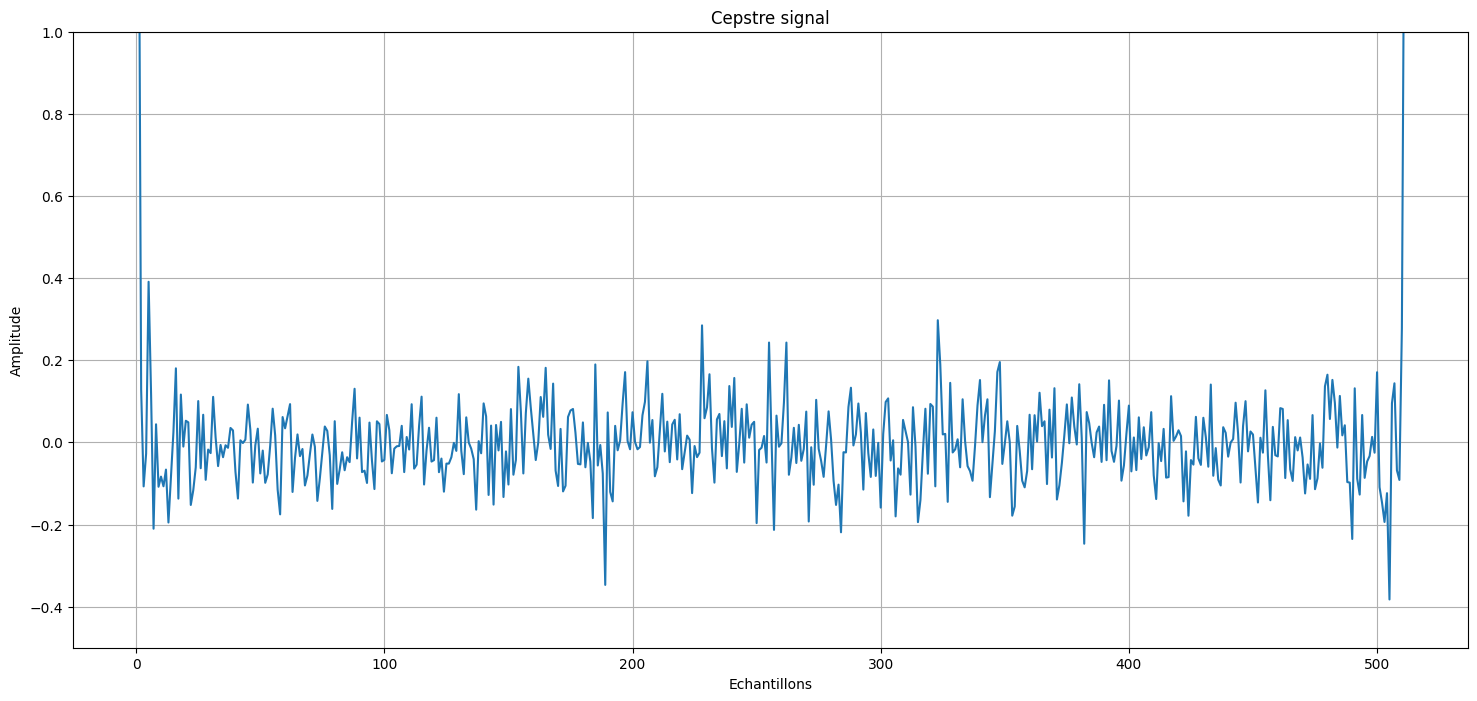

In [73]:
# Calcul du cepstre de l'extrait de signal
cepstre = np.fft.ifft(np.log(extrait_fft))
N = np.floor(len(cepstre)).astype(int)

# Affichage du cepstre
plt.figure(figsize=(18,8))
plt.plot(np.arange(N),np.real(cepstre))
plt.xlabel('Echantillons')
plt.ylabel('Amplitude')
plt.ylim(-0.5,1)
plt.title('Cepstre signal')
plt.grid(True)

plt.show()





***Calculez et affichez le spectre lissé de cet extrait.***

On retire la fréquence fondamentale pour lisser le signal

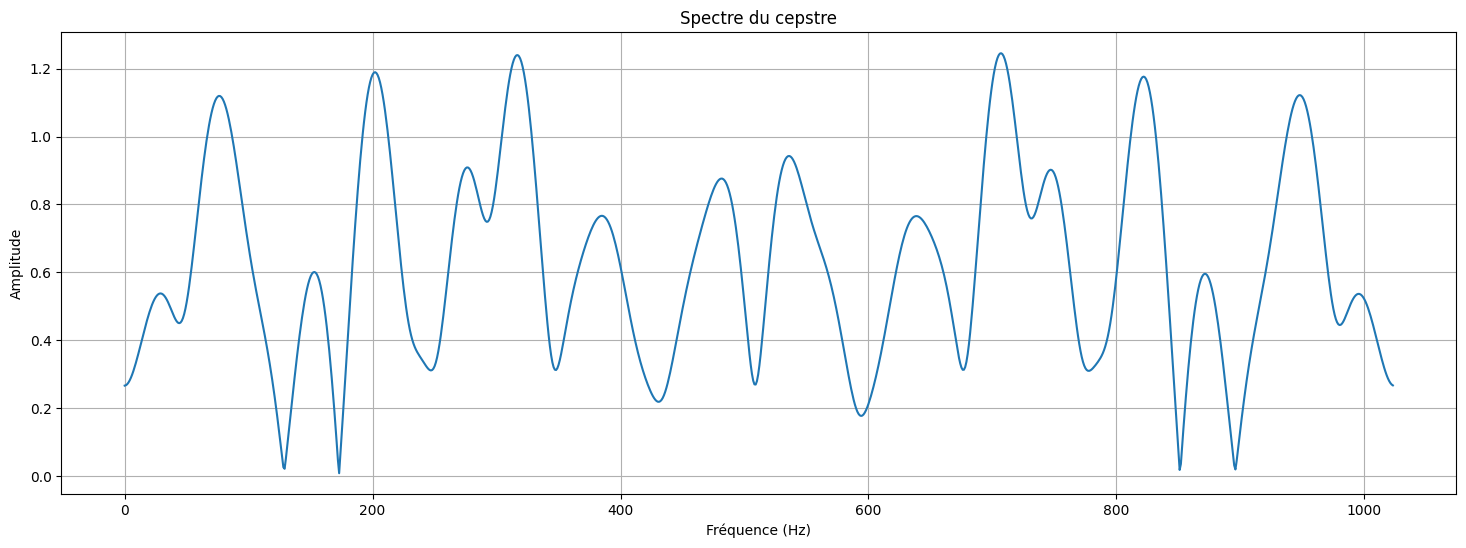

In [76]:
cepstre_partie = cepstre[2:33]
plt.figure(figsize=(18,6))
plt.plot(np.abs(np.fft.fft(cepstre_partie,1024))) # spectre du cepstre
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectre du cepstre')
plt.grid(True)
plt.show()

***En utilisant librosa, affichez une matrice des 12 premiers coefficients MFCC
du signal de départ.***

Text(0.5, 1.0, 'MFCC')

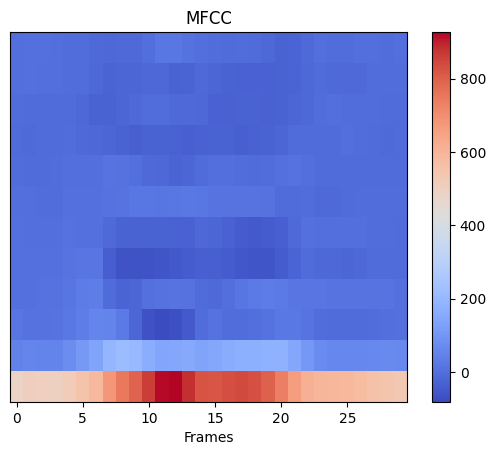

In [113]:
# Calcul des coefficients MFCC
y, sr = signal.astype(float),fe
mfccs = l.feature.mfcc(y=y, sr=sr,n_mfcc=12)

# Affichage de la matrice MFCC
plt.figure()
img = l.display.specshow(mfccs, x_axis='frames', sr=sr)
plt.colorbar(img)
plt.title('MFCC')

***Comparez la premier coefficient de cette matrice avec votre propre calcul de l'énergie normalisé. Y a-t-il une corrélation ? (vérification visuelle, en affichant les deux courbes)***

In [ ]:
# A vous...

Réponse...

In [ ]:
# A vous...

***En utilisant les MFCC, mettez en place un détecteur d'activité vocale afin de filtrer les fichiers que vous avez à traiter : visualisez le résultats sur les signaux "references" (affichage du signal et matérialisation des zones de silence). Vous ne devez pas altérer les zones de silences de moins de 300 ms comprises dans les zones de parole.***

In [ ]:
# A vous...